In [ ]:
import pandas as pd

df = pd.read_excel("EnergieUebersichtCH-2025.xlsx", sheet_name="Zeitreihen0h15", engine="openpyxl")

In [3]:
df.head(5)

,Unnamed: 0,Summe endverbrauchte Energie Regelblock Schweiz\nTotal energy consumed by end users in the Swiss controlblock,Summe produzierte Energie Regelblock Schweiz\nTotal energy production Swiss controlblock,Summe verbrauchte Energie Regelblock Schweiz\nTotal energy consumption Swiss controlblock,Netto Ausspeisung aus dem Übertragungsnetz Schweiz\nNet outflow of the Swiss transmission grid,Vertikale Einspeisung ins Übertragungsnetz Schweiz\nGrid feed-in Swiss transmission grid,Positive Sekundär-Regelenergie\nPositive secundary control energy,Negative Sekundär-Regelenergie\nNegative secundary control energy,Positive Tertiär-Regelenergie\nPositive tertiary control energy,Negative Tertiär-Regelenergie\nNegative tertiary control energy,...,"Produktion Kantone OW, NW, UR\nProduction Cantons OW, NW, UR","Verbrauch Kantone OW, NW, UR\nConsumption Cantons OW, NW, UR","Produktion Kantone GE, VD\nProduction Cantons GE, VD","Verbrauch Kantone GE, VD\nConsumption Cantons GE, VD","Produktion Kantone SH, ZH\nProduction Cantons SH, ZH","Verbrauch Kantone SH, ZH\nConsumption Cantons SH, ZH",Produktion Kantonsübergreifend\nProduction across Cantons,Verbrauch Kantonsübergreifend\nConsumption across Cantons,Produktion Regelzone CH - Ausländische Gebiete\nProduction control area CH - foreign territories,Verbrauch Regelzone CH - Ausländische Gebiete\nConsumption control area CH - foreign territories
0,Zeitstempel,kWh,kWh,kWh,kWh,kWh,kWh,kWh,kWh,kWh,...,kWh,kWh,kWh,kWh,kWh,kWh,kWh,kWh,kWh,kWh
1,01.01.2025 00:00,1660216.203193,1346473.115,1894946.881373,501763.715627,1466277.041627,18260.102,-29.325,51750,0,...,10274.564,31812.567,28985.001,249594.063,21353.118,289001.024,80285.354,52433.261373,5248.363,16002.705
2,01.01.2025 00:15,1655363.68112,1336175.913,1883593.455453,506524.813547,1465358.140547,28628.197,0,51750,0,...,9351.599,31343.6,28952.908,246871.859,21636.409,287567.739,79923.912,47961.099453,5322.233,15876.987
3,01.01.2025 00:30,1651759.987999,1318328.113,1875238.208537,521544.269463,1464570.931463,16234.211,0,28250,0,...,9401.997,31288.998,29157.849,244774.749,21575.387,284571.31,79950.859,43019.050537,5277.748,15725.924
4,01.01.2025 00:45,1632225.502827,1311433.535,1882543.603618,533153.266382,1470716.597382,6969.546,-69.936,43000,0,...,8983.805,30557.806,29366.236,242439.907,21469.533,282109.872,80194.315,46168.438618,5150.639,15431.386


In [ ]:
# Supprimer la première ligne "Zeitstempel"
df = df.iloc[1:].reset_index(drop=True)

# Renommer la première colonne
df.rename(columns={df.columns[0]: "timestamp"}, inplace=True)

# Convertir timestamp
df["timestamp"] = pd.to_datetime(df["timestamp"], dayfirst=True)

In [5]:
df.head()

,timestamp,Summe endverbrauchte Energie Regelblock Schweiz\nTotal energy consumed by end users in the Swiss controlblock,Summe produzierte Energie Regelblock Schweiz\nTotal energy production Swiss controlblock,Summe verbrauchte Energie Regelblock Schweiz\nTotal energy consumption Swiss controlblock,Netto Ausspeisung aus dem Übertragungsnetz Schweiz\nNet outflow of the Swiss transmission grid,Vertikale Einspeisung ins Übertragungsnetz Schweiz\nGrid feed-in Swiss transmission grid,Positive Sekundär-Regelenergie\nPositive secundary control energy,Negative Sekundär-Regelenergie\nNegative secundary control energy,Positive Tertiär-Regelenergie\nPositive tertiary control energy,Negative Tertiär-Regelenergie\nNegative tertiary control energy,...,"Produktion Kantone OW, NW, UR\nProduction Cantons OW, NW, UR","Verbrauch Kantone OW, NW, UR\nConsumption Cantons OW, NW, UR","Produktion Kantone GE, VD\nProduction Cantons GE, VD","Verbrauch Kantone GE, VD\nConsumption Cantons GE, VD","Produktion Kantone SH, ZH\nProduction Cantons SH, ZH","Verbrauch Kantone SH, ZH\nConsumption Cantons SH, ZH",Produktion Kantonsübergreifend\nProduction across Cantons,Verbrauch Kantonsübergreifend\nConsumption across Cantons,Produktion Regelzone CH - Ausländische Gebiete\nProduction control area CH - foreign territories,Verbrauch Regelzone CH - Ausländische Gebiete\nConsumption control area CH - foreign territories
0,2025-01-01 00:00:00,1660216.203193,1346473.115,1894946.881373,501763.715627,1466277.041627,18260.102,-29.325,51750,0,...,10274.564,31812.567,28985.001,249594.063,21353.118,289001.024,80285.354,52433.261373,5248.363,16002.705
1,2025-01-01 00:15:00,1655363.68112,1336175.913,1883593.455453,506524.813547,1465358.140547,28628.197,0,51750,0,...,9351.599,31343.6,28952.908,246871.859,21636.409,287567.739,79923.912,47961.099453,5322.233,15876.987
2,2025-01-01 00:30:00,1651759.987999,1318328.113,1875238.208537,521544.269463,1464570.931463,16234.211,0,28250,0,...,9401.997,31288.998,29157.849,244774.749,21575.387,284571.31,79950.859,43019.050537,5277.748,15725.924
3,2025-01-01 00:45:00,1632225.502827,1311433.535,1882543.603618,533153.266382,1470716.597382,6969.546,-69.936,43000,0,...,8983.805,30557.806,29366.236,242439.907,21469.533,282109.872,80194.315,46168.438618,5150.639,15431.386
4,2025-01-01 01:00:00,1648200.451141,1258011.042,2033616.097477,734743.659523,1618883.659523,22542.82,0,46250,0,...,9533.443,31371.444,28706.245,240760.206,21808.684,280594.779,83499.336,46590.806477,4513.93,16155.01


In [6]:
df.dtypes

timestamp                                                                                                        datetime64[ns]
Summe endverbrauchte Energie Regelblock Schweiz\nTotal energy consumed by end users in the Swiss controlblock            object
Summe produzierte Energie Regelblock Schweiz\nTotal energy production Swiss controlblock                                 object
Summe verbrauchte Energie Regelblock Schweiz\nTotal energy consumption Swiss controlblock                                object
Netto Ausspeisung aus dem Übertragungsnetz Schweiz\nNet outflow of the Swiss transmission grid                           object
                                                                                                                      ...      
Verbrauch Kantone SH, ZH\nConsumption Cantons SH, ZH                                                                     object
Produktion Kantonsübergreifend\nProduction across Cantons                                               

In [7]:
# Convertir toutes les colonnes sauf timestamp en float
for col in df.columns:
    if col != "timestamp":
        df[col] = (
            df[col].astype(str)
                   .str.replace(",", "")
                   .str.replace(" ", "")
                   .str.replace("\n", "")
                   .replace("", None)
                   .astype(float)
        )


In [10]:
df.dtypes

timestamp                                                                                                        datetime64[ns]
Summe endverbrauchte Energie Regelblock Schweiz\nTotal energy consumed by end users in the Swiss controlblock           float64
Summe produzierte Energie Regelblock Schweiz\nTotal energy production Swiss controlblock                                float64
Summe verbrauchte Energie Regelblock Schweiz\nTotal energy consumption Swiss controlblock                               float64
Netto Ausspeisung aus dem Übertragungsnetz Schweiz\nNet outflow of the Swiss transmission grid                          float64
                                                                                                                      ...      
Verbrauch Kantone SH, ZH\nConsumption Cantons SH, ZH                                                                    float64
Produktion Kantonsübergreifend\nProduction across Cantons                                               

In [ ]:
# Renommer les colonnes pour qu'elles soient plus lisibles

df = df.rename(columns={
    df.columns[0]: "timestamp",
    "Summe endverbrauchte Energie Regelblock Schweiz\nTotal energy consumed by end users in the Swiss controlblock": "final_energy_consumed",
    "Summe produzierte Energie Regelblock Schweiz\nTotal energy production Swiss controlblock": "total_energy_produced",
    "Summe verbrauchte Energie Regelblock Schweiz\nTotal energy consumption Swiss controlblock": "total_energy_consumed",
    "Netto Ausspeisung aus dem Übertragungsnetz Schweiz\nNet outflow of the Swiss transmission grid": "net_outflow",
    "Vertikale Einspeisung ins Übertragungsnetz Schweiz\nGrid feed-in Swiss transmission grid": "grid_feed_in",
    "Positive Sekundär-Regelenergie\nPositive secundary control energy": "sec_reg_pos",
    "Negative Sekundär-Regelenergie\nNegative secundary control energy": "sec_reg_neg",
    "Positive Tertiär-Regelenergie\nPositive tertiary control energy": "tert_reg_pos",
    "Negative Tertiär-Regelenergie\nNegative tertiary control energy": "tert_reg_neg",
    "Import": "import",
    "Export": "export",

    # Cantons (production & consommation)
    "Produktion Kanton AG\nProduction Canton AG": "AG_prod",
    "Verbrauch Kanton AG\nConsumption Canton AG": "AG_cons",
    "Produktion Kanton FR\nProduction Canton FR": "FR_prod",
    "Verbrauch Kanton FR\nConsumption Canton FR": "FR_cons",
    "Produktion Kanton GL\nProduction Canton GL": "GL_prod",
    "Verbrauch Kanton GL\nConsumption Canton GL": "GL_cons",
    "Produktion Kanton GR\nProduction Canton GR": "GR_prod",
    "Verbrauch Kanton GR\nConsumption Canton GR": "GR_cons",
    "Produktion Kanton LU\nProduction Canton LU": "LU_prod",
    "Verbrauch Kanton LU\nConsumption Canton LU": "LU_cons",
    "Produktion Kanton NE\nProduction Canton NE": "NE_prod",
    "Verbrauch Kanton NE\nConsumption Canton NE": "NE_cons",
    "Produktion Kanton SO\nProduction Canton SO": "SO_prod",
    "Verbrauch Kanton SO\nConsumption Canton SO": "SO_cons",
    "Produktion Kanton SG\nProduction Canton SG": "SG_prod",
    "Verbrauch Kanton SG\nConsumption Canton SG": "SG_cons",
    "Produktion Kanton TI\nProduction Canton TI": "TI_prod",
    "Verbrauch Kanton TI\nConsumption Canton TI": "TI_cons",
    "Produktion Kanton TG\nProduction Canton TG": "TG_prod",
    "Verbrauch Kanton TG\nConsumption Canton TG": "TG_cons",
    "Produktion Kanton VS\nProduction Canton VS": "VS_prod",
    "Verbrauch Kanton VS\nConsumption Canton VS": "VS_cons",
    "Produktion Kantone AI, AR\nProduction Cantons AI, AR": "AI_AR_prod",
    "Verbrauch Kantone AI, AR\nConsumption Cantons AI, AR": "AI_AR_cons",
    "Produktion Kantone BL, BS\nProduction Cantons BL, BS": "BL_BS_prod",
    "Verbrauch Kantone BL, BS\nConsumption Cantons BL, BS": "BL_BS_cons",
    "Produktion Kantone BE, JU\nProduction Cantons BE, JU": "BE_JU_prod",
    "Verbrauch Kantone BE, JU\nConsumption Cantons BE, JU": "BE_JU_cons",
    "Produktion Kantone SZ, ZG\nProduction Cantons SZ, ZG": "SZ_ZG_prod",
    "Verbrauch Kantone SZ, ZG\nConsumption Cantons SZ, ZG": "SZ_ZG_cons",
    "Produktion Kantone OW, NW, UR\nProduction Cantons OW, NW, UR": "OW_NW_UR_prod",
    "Verbrauch Kantone OW, NW, UR\nConsumption Cantons OW, NW, UR": "OW_NW_UR_cons",
    "Produktion Kantone GE, VD\nProduction Cantons GE, VD": "GE_VD_prod",
    "Verbrauch Kantone GE, VD\nConsumption Cantons GE, VD": "GE_VD_cons",
    "Produktion Kantone SH, ZH\nProduction Cantons SH, ZH": "SH_ZH_prod",
    "Verbrauch Kantone SH, ZH\nConsumption Cantons SH, ZH": "SH_ZH_cons",
    "Produktion Kantonsübergreifend\nProduction across Cantons": "multi_prod",
    "Verbrauch Kantonsübergreifend\nConsumption across Cantons": "multi_cons",
    "Produktion Regelzone CH - Ausländische Gebiete\nProduction control area CH - foreign territories": "foreign_prod",
    "Verbrauch Regelzone CH - Ausländische Gebiete\nConsumption control area CH - foreign territories": "foreign_cons"
})

In [ ]:
#Afficher toutes les colonnes et enlever la limite de colonnes
pd.set_option('display.max_columns', None)

In [14]:
df.head()

,timestamp,final_energy_consumed,total_energy_produced,total_energy_consumed,net_outflow,grid_feed_in,sec_reg_pos,sec_reg_neg,tert_reg_pos,tert_reg_neg,Verbundaustausch CH->AT\nCross Border Exchange CH->AT,Verbundaustausch AT->CH\nCross Border Exchange AT->CH,Verbundaustausch CH->DE\nCross Border Exchange CH->DE,Verbundaustausch DE->CH\nCross Border Exchange DE->CH,Verbundaustausch CH->FR\nCross Border Exchange CH->FR,Verbundaustausch FR->CH\nCross Border Exchange FR->CH,Verbundaustausch CH->IT\nCross Border Exchange CH->IT,Verbundaustausch IT->CH\nCross Border Exchange IT->CH,Transit,import,export,Durchschnittliche positive Sekundär-Regelenergie Preise\nAverage positive secondary control energy prices,Durchschnittliche negative Sekundär-Regelenergie Preise\nAverage negative secondary control energy prices,Durchschnittliche positive Tertiär-Regelenergie Preise\nAverage positive tertiary control energy prices,Durchschnittliche negative Tertiär-Regelenergie Preise\nAverage negative tertiary control energy prices,AG_prod,AG_cons,FR_prod,FR_cons,GL_prod,GL_cons,GR_prod,GR_cons,LU_prod,LU_cons,NE_prod,NE_cons,SO_prod,SO_cons,SG_prod,SG_cons,TI_prod,TI_cons,TG_prod,TG_cons,VS_prod,VS_cons,AI_AR_prod,AI_AR_cons,BL_BS_prod,BL_BS_cons,BE_JU_prod,BE_JU_cons,SZ_ZG_prod,SZ_ZG_cons,OW_NW_UR_prod,OW_NW_UR_cons,GE_VD_prod,GE_VD_cons,SH_ZH_prod,SH_ZH_cons,multi_prod,multi_cons,foreign_prod,foreign_cons
0,2025-01-01 00:00:00,1.660216e+06,1346473.115,1.894947e+06,501763.715627,1.466277e+06,18260.102,-29.325,51750.0,0.0,44500.0,222630.0,6800.0,817936.0,94388.0,368563.0,727188.0,12887.0,872876.0,1422016.0,872876.0,294.81,39.24,155.100000,0.0,506882.465,154349.348,9306.136,84200.122,22279.579,11138.966,79466.867,76313.911,6976.613,96896.000,321.799,14355.237,263314.729,40331.846,9032.5908,91740.1124,21782.959,80680.289,4152.845,53404.819,188570.882,157104.663,955.7222,16240.5116,23703.419,92203.818,58575.413,228820.487,5004.696,58323.131,10274.564,31812.567,28985.001,249594.063,21353.118,289001.024,80285.354,52433.261373,5248.363,16002.705
1,2025-01-01 00:15:00,1.655364e+06,1336175.913,1.883593e+06,506524.813547,1.465358e+06,28628.197,0.000,51750.0,0.0,13900.0,223640.0,700.0,743470.0,92752.0,351840.0,680404.0,18002.0,787756.0,1336952.0,787756.0,559.75,0.00,155.100000,0.0,507043.911,156966.223,9389.644,83945.390,25880.160,10858.787,78600.258,76297.540,7146.725,96005.841,297.840,14104.866,263102.377,40652.139,9378.7862,90101.6632,20052.261,79713.495,4310.246,53063.941,180579.233,155613.128,976.2988,15847.0478,24057.597,92455.005,55170.097,230402.928,5003.418,57944.177,9351.599,31343.600,28952.908,246871.859,21636.409,287567.739,79923.912,47961.099453,5322.233,15876.987
2,2025-01-01 00:30:00,1.651760e+06,1318328.113,1.875238e+06,521544.269463,1.464571e+06,16234.211,0.000,28250.0,0.0,53900.0,167331.0,0.0,688725.0,77659.0,355588.0,549741.0,27576.0,681300.0,1239220.0,681300.0,260.11,0.00,147.329115,0.0,506913.680,158512.642,9357.794,81693.539,25208.700,10974.180,75572.619,76423.923,7093.681,98683.700,316.293,13717.055,263392.348,41113.938,9014.2962,88741.5892,19382.639,78964.412,4123.937,52820.775,167484.181,155419.145,977.1918,15734.4848,24292.840,92582.405,54843.466,232880.923,4990.607,57595.466,9401.997,31288.998,29157.849,244774.749,21575.387,284571.310,79950.859,43019.050537,5277.748,15725.924
3,2025-01-01 00:45:00,1.632226e+06,1311433.535,1.882544e+06,533153.266382,1.470717e+06,6969.546,-69.936,43000.0,0.0,72500.0,175372.0,3800.0,765715.0,85792.0,348684.0,577547.0,22232.0,739639.0,1312003.0,739639.0,208.25,7.24,152.489535,0.0,507326.596,155914.511,9618.502,79714.236,19352.143,31114.780,74085.964,75239.942,6951.695,100268.609,307.562,13553.490,263507.047,40506.166,8800.3972,86684.2042,18123.095,78032.825,4213.708,52099.965,169620.242,158973.387,967.3748,15376.7728,24597.681,91344.267,53789.712,230424.007,5007.288,56589.032,8983.805,30557.806,29366.236,242439.907,21469.533,282109.872,80194.315,46168.438618,5150.639,15431.386
4,2025-01-01 01:00:00,1.

In [ ]:
#Renommer les colonnes restantes
df = df.rename(columns={
    "Verbundaustausch CH->AT\nCross Border Exchange CH->AT": "Cross Border Exchange CH->AT",
    "Verbundaustausch AT->CH\nCross Border Exchange AT->CH": "Cross Border Exchange AT->CH",
    "Verbundaustausch CH->DE\nCross Border Exchange CH->DE": "Cross Border Exchange CH->DE",
    "Verbundaustausch DE->CH\nCross Border Exchange DE->CH": "Cross Border Exchange DE->CH",
    "Verbundaustausch CH->FR\nCross Border Exchange CH->FR": "Cross Border Exchange CH->FR",
    "Verbundaustausch FR->CH\nCross Border Exchange FR->CH": "Cross Border Exchange FR->CH",
    "Verbundaustausch CH->IT\nCross Border Exchange CH->IT": "Cross Border Exchange CH->IT",
    "Verbundaustausch IT->CH\nCross Border Exchange IT->CH": "Cross Border Exchange IT->CH",
})

In [ ]:
#Renommer les colonnes restantes
df = df.rename(columns={
    'Durchschnittliche positive Sekundär-Regelenergie Preise\nAverage positive secondary control energy prices': 'Average positive secondary control energy prices',
    'Durchschnittliche negative Sekundär-Regelenergie Preise\nAverage negative secondary control energy prices': 'Average negative secondary control energy prices',
    'Durchschnittliche positive Tertiär-Regelenergie Preise\nAverage positive tertiary control energy prices': 'Average positive tertiary control energy prices',
    'Durchschnittliche negative Tertiär-Regelenergie Preise\nAverage negative tertiary control energy prices': 'Average negative tertiary control energy prices',
})

In [20]:
df.head()
df.dtypes

timestamp                datetime64[ns]
final_energy_consumed           float64
total_energy_produced           float64
total_energy_consumed           float64
net_outflow                     float64
                              ...      
SH_ZH_cons                      float64
multi_prod                      float64
multi_cons                      float64
foreign_prod                    float64
foreign_cons                    float64
Length: 65, dtype: object

In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


Feature Engineering

In [22]:
df = df.sort_values('timestamp')
df = df.reset_index(drop=True)

In [24]:
# Create time-based features
df['hour'] = df['timestamp'].dt.hour
df['dayofweek'] = df['timestamp'].dt.dayofweek
df['month'] = df['timestamp'].dt.month
df['day'] = df['timestamp'].dt.day
df['is_weekend'] = df['dayofweek'].isin([5, 6]).astype(int)


In [31]:
features = [
    'hour', 'dayofweek', 'month', 'day', 'is_weekend',
    'total_energy_produced', 'grid_feed_in', 'net_outflow'
]

X = df[features]
y = df['total_energy_consumed']


Random Forest ML *15Min intervals*

In [32]:
# Use 80% for training
split_index = int(len(df) * 0.8)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

In [33]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.3f}")


RMSE: 144110.33
R² Score: 0.466


c:\Users\soubh\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


The Random Forest model achieved an R² score of 0.466, which indicates moderate performance but leaves significant room for improvement.

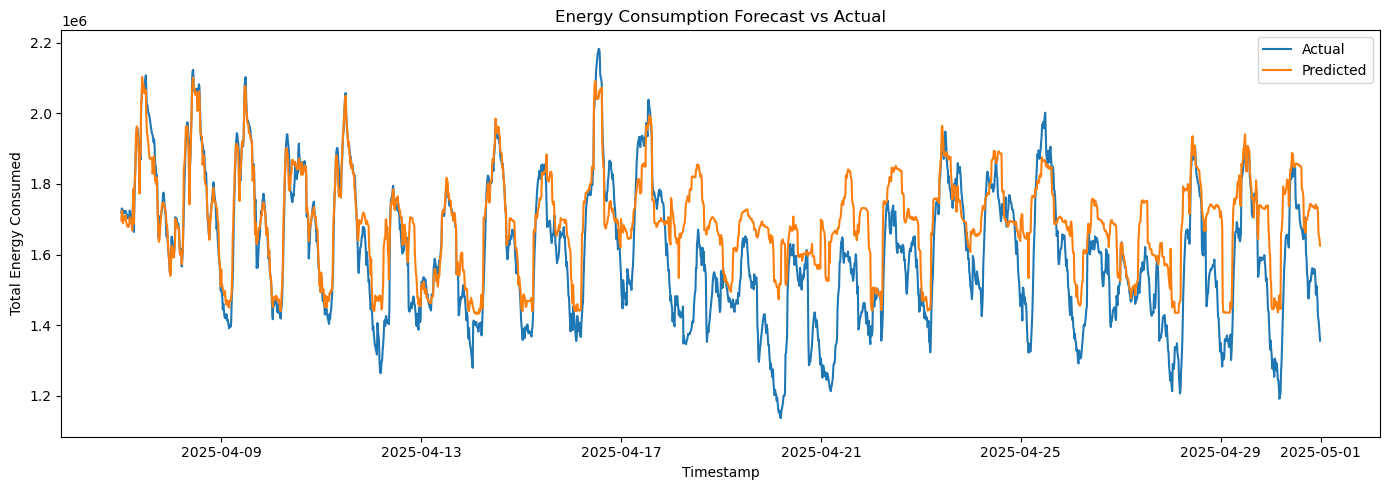

In [34]:
import matplotlib.pyplot as plt

# For plotting with timestamp
test_timestamps = df['timestamp'][split_index:]

plt.figure(figsize=(14,5))
plt.plot(test_timestamps, y_test, label="Actual")
plt.plot(test_timestamps, y_pred, label="Predicted")
plt.title("Energy Consumption Forecast vs Actual")
plt.xlabel("Timestamp")
plt.ylabel("Total Energy Consumed")
plt.legend()
plt.tight_layout()
plt.show()


XGBoost ML

In [35]:
# Lag features
df['lag_1h'] = df['total_energy_consumed'].shift(1)
df['lag_24h'] = df['total_energy_consumed'].shift(96)

# Rolling averages
df['roll_6h'] = df['total_energy_consumed'].rolling(window=24).mean()
df['roll_24h'] = df['total_energy_consumed'].rolling(window=96).mean()

In [38]:
df_model = df.dropna().copy()

In [41]:
features = [
    'hour', 'dayofweek', 'month', 'is_weekend',
    'total_energy_produced', 'grid_feed_in', 'net_outflow',
    'lag_1h', 'lag_24h', 'roll_6h', 'roll_24h'
]

X = df_model[features]
y = df_model['total_energy_consumed']


In [42]:
split_index = int(len(df_model) * 0.8)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

In [44]:
pip install xgboost

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 1.0/150.0 MB 6.3 MB/s eta 0:00:24
    --------------------------------------- 2.6/150.0 MB 6.9 MB/s eta 0:00:22
   - -------------------------------------- 5.2/150.0 MB 8.9 MB/s eta 0:00:17
   -- ------------------------------------- 7.9/150.0 MB 9.9 MB/s eta 0:00:15
   -- ------------------------------------- 9.7/150.0 MB 9.6 MB/s eta 0:00:15
   --- ------------------------------------ 12.1/150.0 MB 9.8 MB/s eta 0:00:15
   --- ------------------------------------ 14.7/150.0 MB 10.1 MB/s eta 0:00:14
   ---- ----------------------------------- 17.0/150.0 MB 10.3 MB/s eta 0:00:13
   ----- ---------------------------------- 19.4/150.0 MB 10.5 MB/s eta 0:00:13
   ----- ---------------------------------- 22.0/150.0 MB 10.6 MB/s eta 0:00:13
   ------ --------------------------------- 24.6/150.0 MB 10.8 MB/s eta 0:00:12
   ------- -------------------------------- 27.3/150.0 MB 10

In [45]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

model = XGBRegressor(n_estimators=200, learning_rate=0.05, max_depth=6, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"📉 RMSE: {rmse:.2f}")
print(f"📈 R² Score: {r2:.3f}")

📉 RMSE: 72869.20
📈 R² Score: 0.864


c:\Users\soubh\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


The XGBoost model achieved an R² score of 0.864, indicating that it explains approximately 86.4% of the variance in the target variable

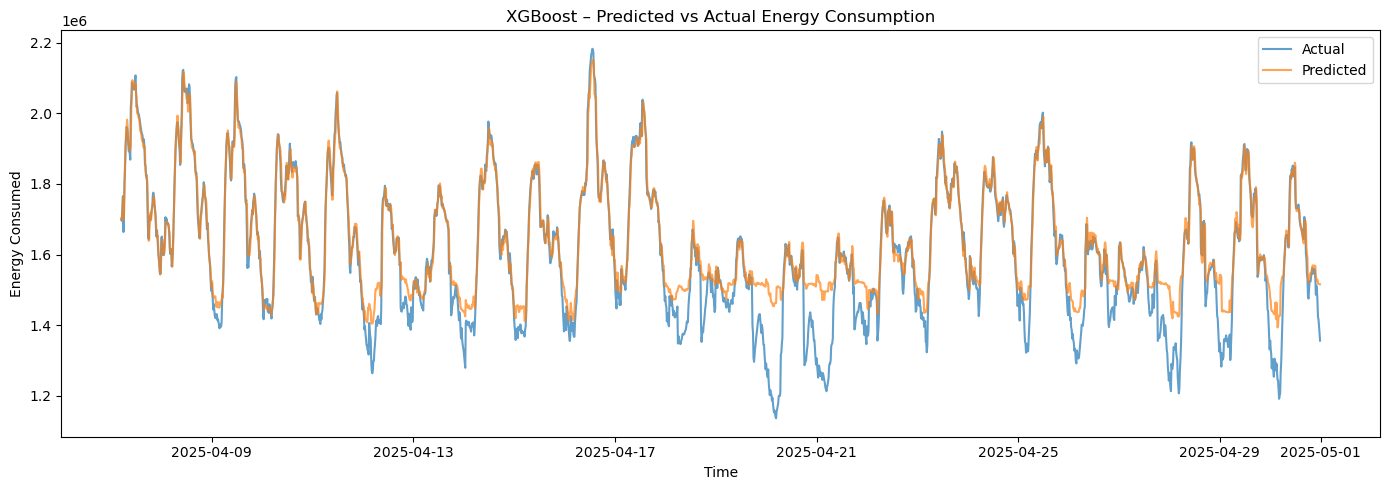

In [46]:
import matplotlib.pyplot as plt

test_time = df_model['timestamp'].iloc[split_index:]

plt.figure(figsize=(14,5))
plt.plot(test_time, y_test, label="Actual", alpha=0.7)
plt.plot(test_time, y_pred, label="Predicted", alpha=0.7)
plt.title("XGBoost – Predicted vs Actual Energy Consumption")
plt.xlabel("Time")
plt.ylabel("Energy Consumed")
plt.legend()
plt.tight_layout()
plt.show()


We compared the performance of two models—Random Forest (RF) and XGBoost—after incorporating additional features, such as lag features.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Train Models

rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

xgb = XGBRegressor(n_estimators=300, learning_rate=0.05, max_depth=6, random_state=42)
xgb.fit(X_train, y_train)

# Predict

y_pred_rf = rf.predict(X_test)
y_pred_xgb = xgb.predict(X_test)

# Metrics

rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
r2_rf = r2_score(y_test, y_pred_rf)

rmse_xgb = mean_squared_error(y_test, y_pred_xgb, squared=False)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"🔵 Random Forest — RMSE: {rmse_rf:.2f}, R²: {r2_rf:.3f}")
print(f"🟠 XGBoost       — RMSE: {rmse_xgb:.2f}, R²: {r2_xgb:.3f}")


🔵 Random Forest — RMSE: 371832.16, R²: 0.776
🟠 XGBoost       — RMSE: 390957.96, R²: 0.752


c:\Users\soubh\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\soubh\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Random Forest excelled with smoother hourly targets, while XGBoost previously dominated with more volatile 15-minute intervals, reflecting each model’s strengths.

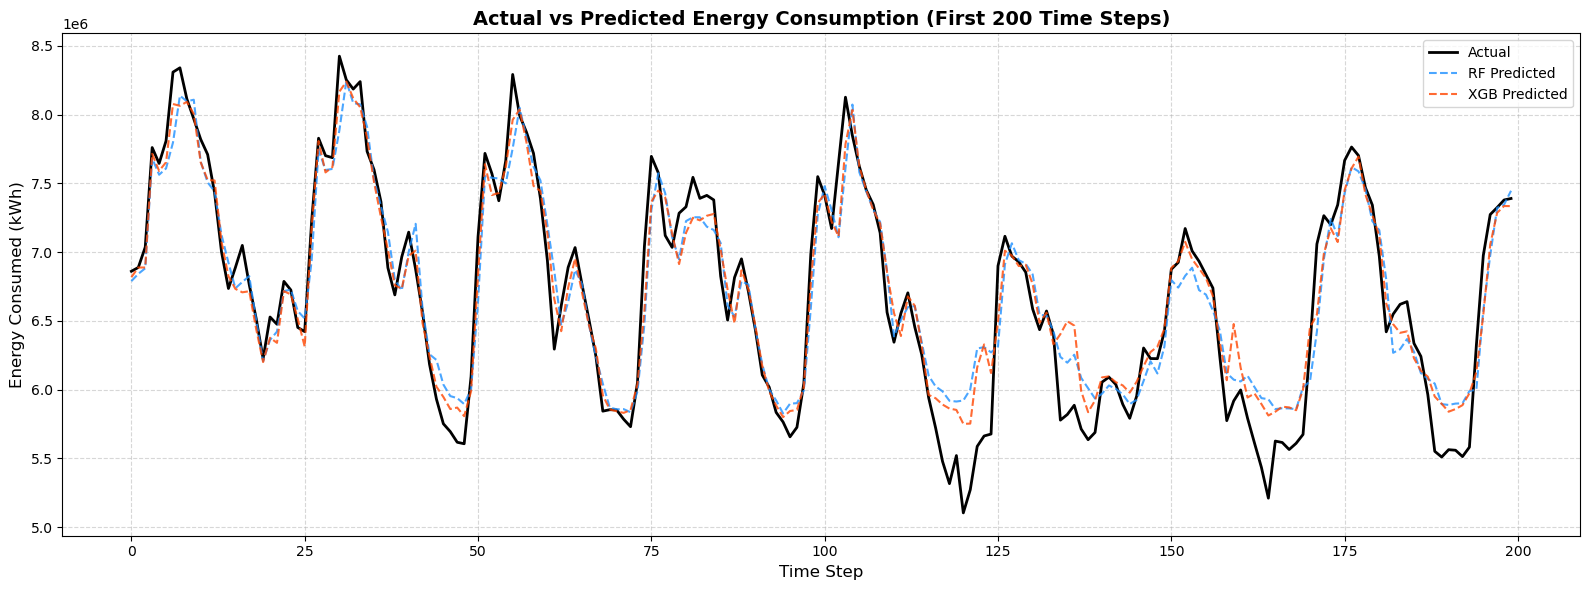

In [100]:
plt.figure(figsize=(16, 6))

# Plot actual values
plt.plot(y_test.values[:200], label="Actual", color='black', linewidth=2)

# Plot RF predictions
plt.plot(y_pred_rf[:200], label="RF Predicted", color='dodgerblue', linestyle='--', linewidth=1.5, alpha=0.8)

# Plot XGB predictions
plt.plot(y_pred_xgb[:200], label="XGB Predicted", color='orangered', linestyle='--', linewidth=1.5, alpha=0.8)

# Titles and labels
plt.title("Actual vs Predicted Energy Consumption (First 200 Time Steps)", fontsize=14, fontweight='bold')
plt.ylabel("Energy Consumed (kWh)", fontsize=12)
plt.xlabel("Time Step", fontsize=12)

# Grid, legend, and layout
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(frameon=True, fontsize=10)
plt.tight_layout()
plt.show()


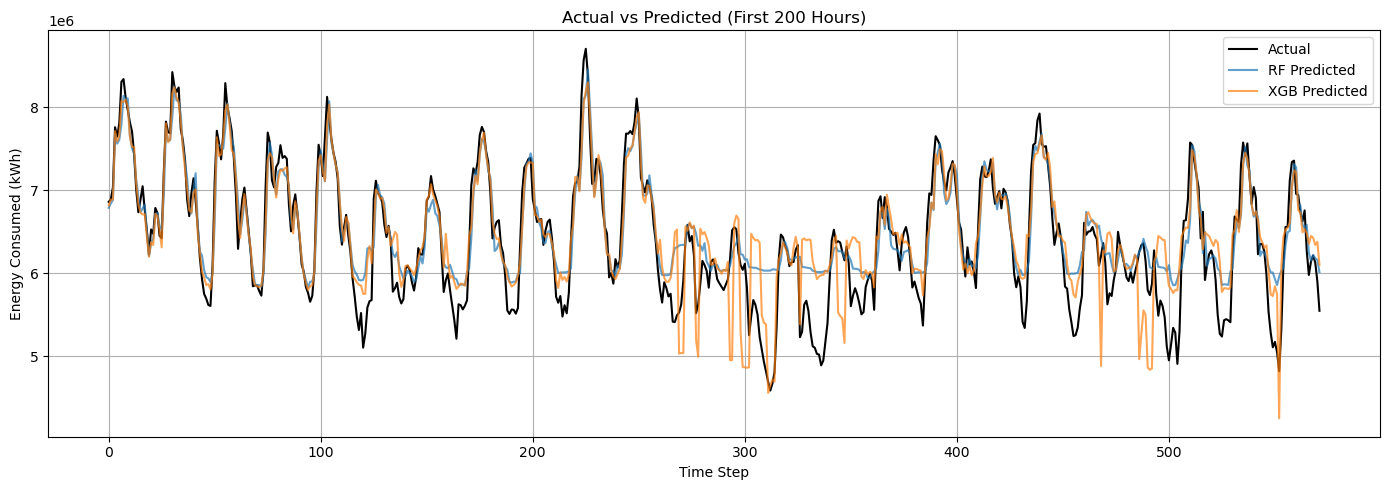

In [96]:
plt.figure(figsize=(14,5))
plt.plot(y_test.values, label="Actual", color='black')
plt.plot(y_pred_rf, label="RF Predicted", alpha=0.7)
plt.plot(y_pred_xgb, label="XGB Predicted", alpha=0.7)
plt.title("Actual vs Predicted (First 200 Hours)")
plt.ylabel("Energy Consumed (kWh)")
plt.xlabel("Time Step")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


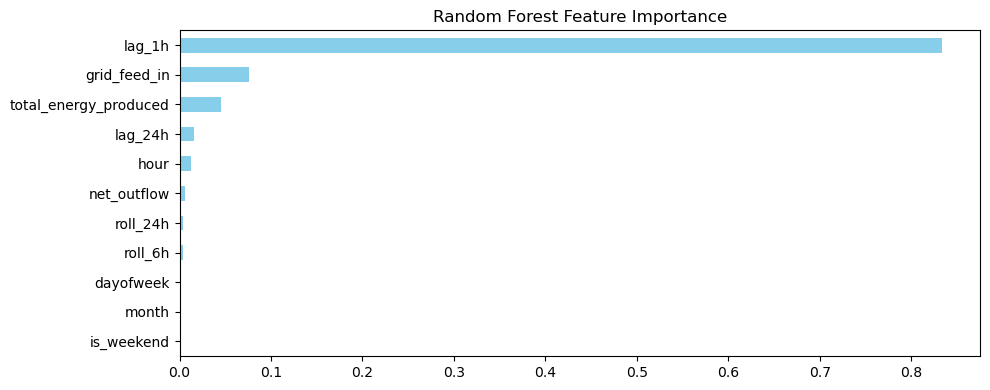

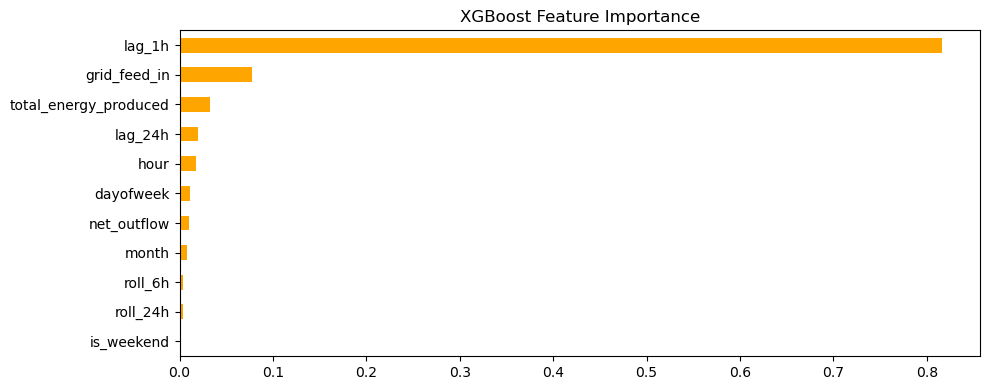

In [97]:
import pandas as pd

# Get feature importances
feat_imp_rf = pd.Series(rf.feature_importances_, index=X_train.columns)
feat_imp_xgb = pd.Series(xgb.feature_importances_, index=X_train.columns)

# Plot
plt.figure(figsize=(10,4))
feat_imp_rf.sort_values().plot(kind='barh', title="Random Forest Feature Importance", color='skyblue')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,4))
feat_imp_xgb.sort_values().plot(kind='barh', title="XGBoost Feature Importance", color='orange')
plt.tight_layout()
plt.show()
